# Notebook to run the V1 cortical column simulation and recreate figures from Billeh et al., 2020

In [ ]:
%pip install -q --force-reinstall airavata-python-sdk[notebook]
import airavata_jupyter_magic

%authenticate
%request_runtime hpc_cpu --file=cybershuttle.yml --walltime=60 --use=NeuroData25VC1:cloud,expanse:shared,anvil:shared
%switch_runtime hpc_cpu

In [ ]:
!git clone https://github.com/cyber-shuttle/V1_example workspace
%cd workspace
!ln -s /cybershuttle_data/allenai-v1/v1_point/network
!ln -s /cybershuttle_data/allenai-v1/v1_point/components

In [1]:
import matplotlib.pyplot as plt
import os
import pathlib

In [2]:
filternet_config = 'filternet_configs/config.filternet.dg.2Hz.270deg.json'
pointnet_config = 'v1_point_config/config.json'

In [3]:
#from run_filternet import run as run_filternet

#run_filternet(filternet_config)

In [4]:
from run_pointnet import main as run_pointnet

run_pointnet(pointnet_config)


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:33:09

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



[laurag-ux1.corp.alleninstitute.org:1518656] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.laurag-ux1.20497/jf.0/2111242240/shared_mem_cuda_pool.laurag-ux1 could be created.
[laurag-ux1.corp.alleninstitute.org:1518656] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


2025-04-09 16:55:22,057 [INFO] Created log file
2025-04-09 16:55:23,182 [INFO] Batch processing nodes for v1/0.
2025-04-09 16:55:23,233 [INFO] Batch processing nodes for lgn/0.
2025-04-09 16:55:23,243 [INFO] Batch processing nodes for bkg/0.
2025-04-09 16:55:36,715 [INFO] Setting up output directory
2025-04-09 16:55:36,718 [INFO] Building cells.
2025-04-09 16:55:41,196 [INFO] Building recurrent connections
2025-04-09 16:56:33,273 [INFO] Network created.
2025-04-09 16:56:33,276 [INFO] Build virtual cell stimulations for LGN_spikes
2025-04-09 16:56:42,411 [INFO] Build virtual cell stimulations for BKG_spikes
2025-04-09 16:56:45,756 [INFO] Starting Simulation
2025-04-09 17:01:17,448 [INFO] Simulation finished, finalizing results.
2025-04-09 17:01:25,440 [INFO] Done.


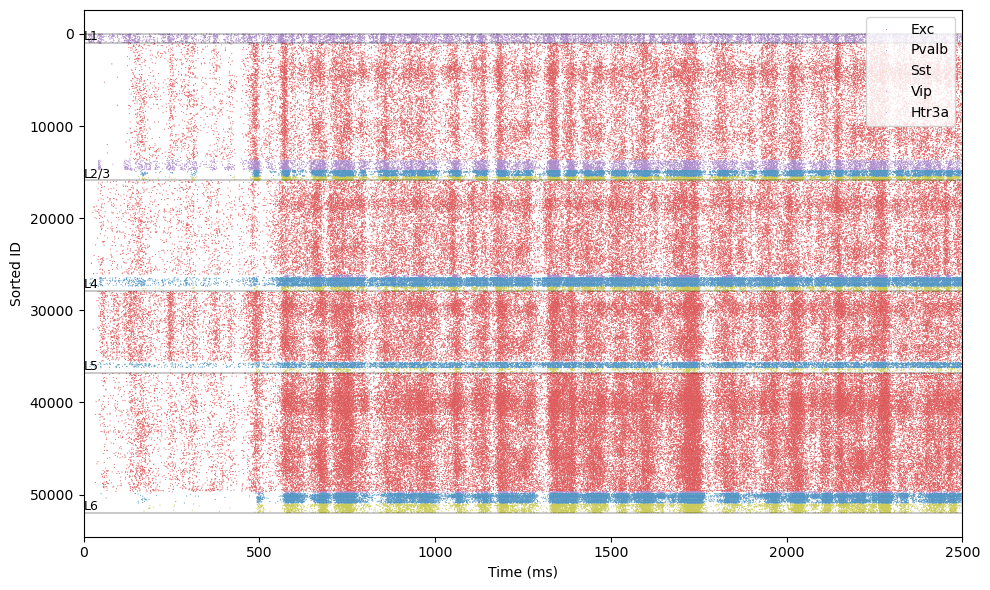

In [5]:
import plotting_utils as pu

pointnet_config = 'output/config.json'
net = 'full'
sortby='tuning_angle'
radius = 400.0

plt.figure(figsize=(10, 6))


ax = pu.plot_raster(pointnet_config, sortby=sortby, **pu.settings[net])
ax.set_xlim([0, 2500])
plt.tight_layout()
config_folder = os.path.dirname(pointnet_config)
plt.savefig(f"{config_folder}/raster_by_{sortby}.png", dpi=300)

In [6]:
spikes_df, hue_order, color_dict, layer_divisions = pu.make_figure_elements(pointnet_config, radius, sortby)

In [7]:
# calculate firing rates
rates = spikes_df[spikes_df['timestamps']>500.0].groupby(['Sorted ID'])['timestamps'].count()/2.5
rates = rates.reset_index(name = 'Mean Rate')
rates_df = spikes_df[['population', 'Sorted ID', 'Cell Type', 'Tuning Angle', 'location']].drop_duplicates('Sorted ID')
rates_df = rates_df.merge(rates, how='left', left_on='Sorted ID', right_on = 'Sorted ID')


<Axes: xlabel='location', ylabel='Mean Rate'>

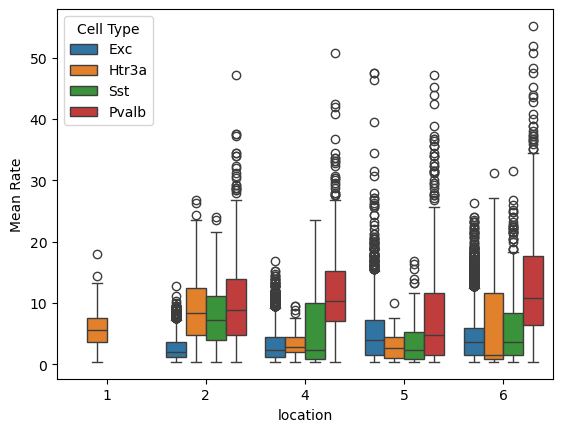

In [9]:
import seaborn as sns
order = [1, 2, 4, 5, 6]
sns.boxplot(rates_df, x='location', y='Mean Rate', hue='Cell Type', order=order)

In [2]:
from run_pointnet import main as run_pointnet

pointnet_config_movie = 'v1_point_config/config.movie.json'
run_pointnet(pointnet_config_movie)


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:33:09

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



[laurag-ux1.corp.alleninstitute.org:1520304] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.laurag-ux1.20497/jf.0/4037738496/shared_mem_cuda_pool.laurag-ux1 could be created.
[laurag-ux1.corp.alleninstitute.org:1520304] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


2025-04-09 17:18:22,356 [INFO] Created log file
2025-04-09 17:18:23,104 [INFO] Batch processing nodes for v1/0.
2025-04-09 17:18:23,248 [INFO] Batch processing nodes for lgn/0.
2025-04-09 17:18:23,259 [INFO] Batch processing nodes for bkg/0.
2025-04-09 17:18:36,318 [INFO] Setting up output directory
2025-04-09 17:18:36,320 [INFO] Building cells.
2025-04-09 17:18:40,791 [INFO] Building recurrent connections
2025-04-09 17:19:35,203 [INFO] Network created.
2025-04-09 17:19:35,205 [INFO] Build virtual cell stimulations for LGN_spikes
2025-04-09 17:19:43,680 [INFO] Build virtual cell stimulations for BKG_spikes
2025-04-09 17:19:46,793 [INFO] Starting Simulation
2025-04-09 17:23:42,052 [INFO] Simulation finished, finalizing results.
2025-04-09 17:23:45,753 [INFO] Done.


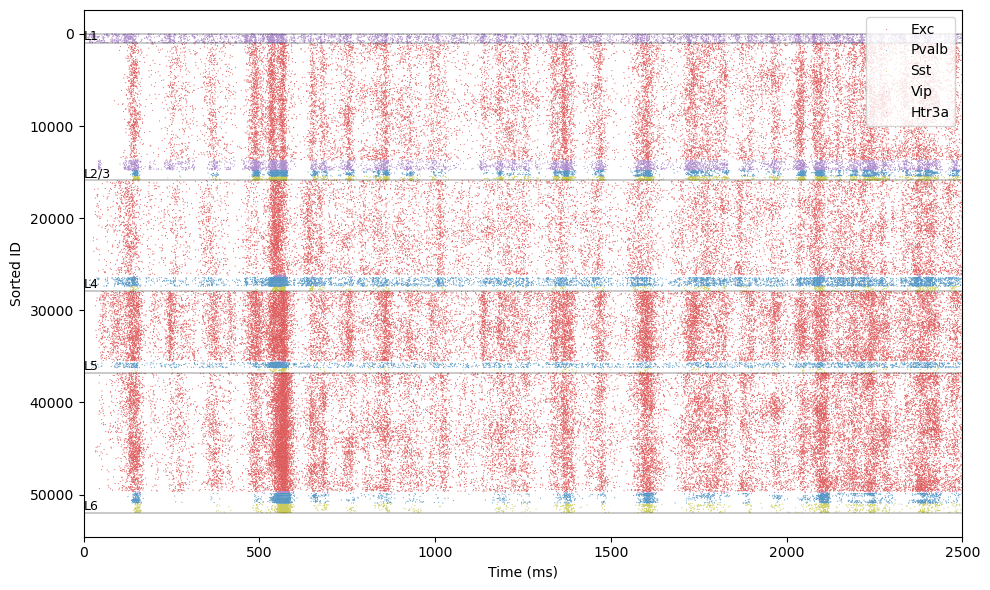

In [5]:
import plotting_utils as pu
pointnet_config_movie = 'output_movie/config.movie.json'
net = 'full'
sortby='tuning_angle'
radius = 400.0

plt.figure(figsize=(10, 6))


ax = pu.plot_raster(pointnet_config_movie, sortby=sortby, **pu.settings[net])
ax.set_xlim([0, 2500])
plt.tight_layout()
config_folder = os.path.dirname(pointnet_config_movie)
plt.savefig(f"{config_folder}/raster_by_{sortby}.png", dpi=300)

In [6]:
pointnet_config_flash = 'v1_point_config/config.fullfield_250ms.json'
run_pointnet(pointnet_config_flash)

2025-04-09 17:26:29,133 [INFO] Created log file
2025-04-09 17:26:29,766 [INFO] Batch processing nodes for v1/0.
2025-04-09 17:26:29,806 [INFO] Batch processing nodes for lgn/0.
2025-04-09 17:26:29,813 [INFO] Batch processing nodes for bkg/0.
2025-04-09 17:26:33,987 [INFO] Setting up output directory
2025-04-09 17:26:33,989 [INFO] Building cells.
2025-04-09 17:26:38,662 [INFO] Building recurrent connections
2025-04-09 17:27:00,581 [INFO] Network created.
2025-04-09 17:27:00,584 [INFO] Build virtual cell stimulations for LGN_spikes
2025-04-09 17:27:07,531 [INFO] Build virtual cell stimulations for BKG_spikes
2025-04-09 17:27:09,732 [INFO] Starting Simulation
2025-04-09 17:31:12,526 [INFO] Simulation finished, finalizing results.
2025-04-09 17:31:16,991 [INFO] Done.


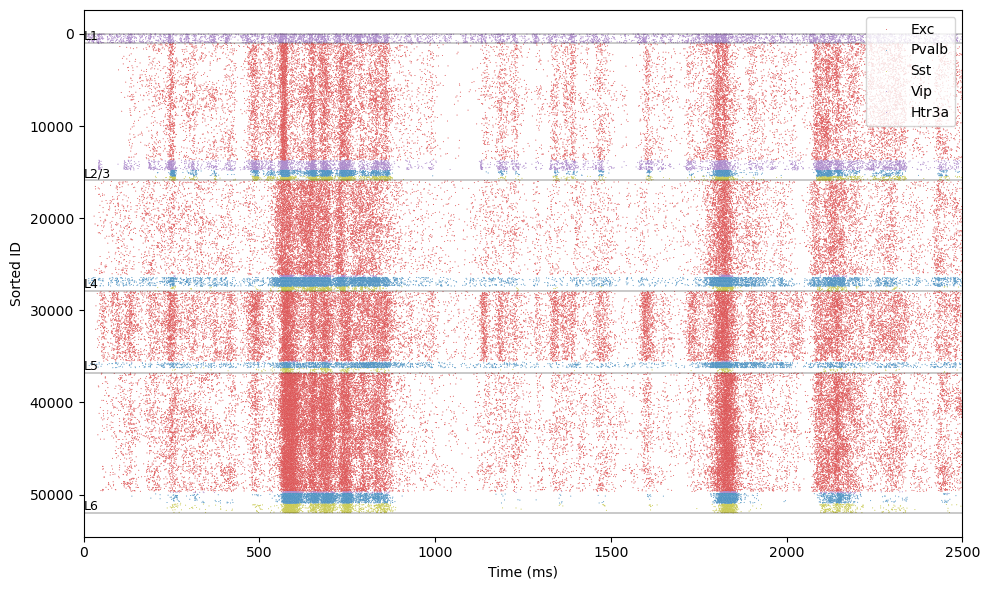

In [7]:
pointnet_config_flash = 'output_flash/config.fullfield_250ms.json'
net = 'full'
sortby='tuning_angle'
radius = 400.0

plt.figure(figsize=(10, 6))


ax = pu.plot_raster(pointnet_config_flash, sortby=sortby, **pu.settings[net])
ax.set_xlim([0, 2500])
plt.tight_layout()
config_folder = os.path.dirname(pointnet_config_flash)
plt.savefig(f"{config_folder}/raster_by_{sortby}.png", dpi=300)

In [ ]:
%stop_runtime hpc_cpu
%switch_runtime local